### Import Library

In [1]:
import pandas as pd 
from sklearn import tree 
import matplotlib.pyplot as plt 

### Load Data

In [32]:
df = pd.read_csv('data\game data.csv')
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


### EDA

In [33]:
df.drop('Days', axis=1, inplace=True)

In [34]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [35]:
x = df.drop('Wear Jacket?', axis=1)

In [36]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [37]:
y = df['Wear Jacket?']

In [38]:
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [39]:
x.value_counts()

Outlook  Temprature  Routine
Cloudy   Cold        Indoor     1
                     Outdoor    1
         Warm        Indoor     1
                     Outdoor    1
Sunny    Cold        Indoor     1
                     Outdoor    1
         Warm        Indoor     1
                     Outdoor    1
Name: count, dtype: int64

In [40]:
df.Outlook.value_counts()

Outlook
Sunny     4
Cloudy    4
Name: count, dtype: int64

In [41]:
df.Temprature.value_counts()

Temprature
Cold    4
Warm    4
Name: count, dtype: int64

In [42]:
df.Routine.value_counts()

Routine
Indoor     4
Outdoor    4
Name: count, dtype: int64

# Encode

Outlook-> Sunny=1, Cloudy=0 <br>
Temprature -> Warm=1, cold=0 <br>
Routine -> outdoor=1, indoor=0

In [43]:
x = x.replace({'Cloudy':0, 'Sunny':1, 'Warm': 1, 'Cold': 0, 'Outdoor':1,'Indoor': 0 })

In [44]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


### Import Decision Tree Python Library

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Create instance
clf = DecisionTreeClassifier()

In [47]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

In [49]:
#training decision tree 
clf.fit(x,y) 

DecisionTreeClassifier()

In [51]:
#Predit: sunny, cold, indoor 
clf.predict([[1, 0, 0]])

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [52]:
#Predit: sunny, warm, indoor 
clf.predict([[1, 1, 0]]) 

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [53]:
#Predit: cloudy, cold, indoor 
clf.predict([[0, 0, 0]]) 

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

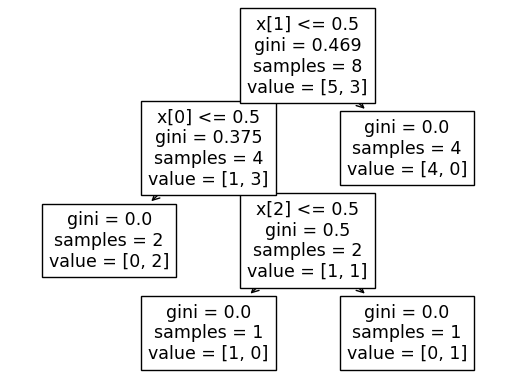

In [54]:
# Draw Tree
tree.plot_tree(clf)

In [57]:
x.columns.tolist()

['Outlook', 'Temprature', 'Routine']

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

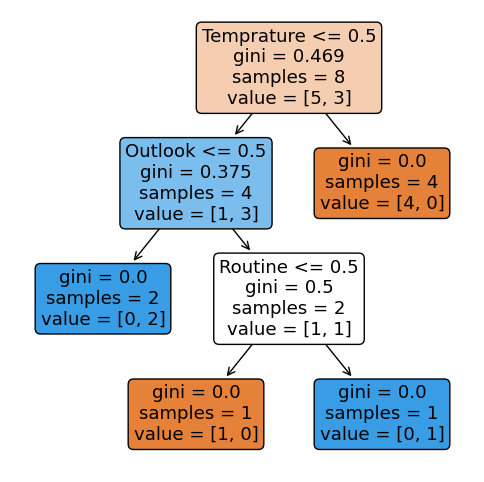

In [58]:
plt.figure(figsize=(6,6))
tree.plot_tree(clf, feature_names=x.columns.tolist(), filled=True, rounded=True)